<a href="https://colab.research.google.com/github/WelfLowe/Anomaly-Detector/blob/main/Variants_of_Simple_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Here's the Python code to generate and plot two 2D distributions:  

- The first distribution has a correlation of **0.75** and a mean of **(-1,-1)**.  
- The second distribution has **no correlation** and a mean of **(1,1)**.  

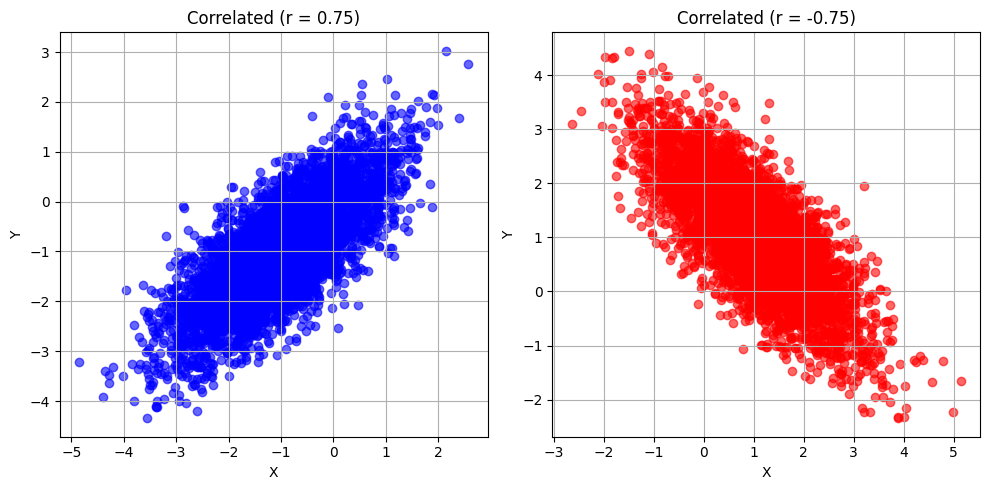

In [58]:
# Set random seed for reproducibility
np.random.seed(42)
N = 5000
r1 = 0.75
r2 = -0.75
# Generate correlated data (correlation = 0.5)
mean = [-1, -1]
cov_correlated = [[1, r1], [r1, 1]]  # Covariance matrix with correlation 0.75
data_correlated = np.random.multivariate_normal(mean, cov_correlated, N)

# Generate uncorrelated data (correlation = 0)
mean = [1, 1]
cov_uncorrelated = [[1, r2], [r2, 1]]  # Covariance matrix with no correlation
data_uncorrelated = np.random.multivariate_normal(mean, cov_uncorrelated, N)

# Plot the data
plt.figure(figsize=(10, 5))

# Plot correlated data
plt.subplot(1, 2, 1)
plt.scatter(data_correlated[:, 0], data_correlated[:, 1], color='blue', alpha=0.6)
plt.title(f"Correlated (r = {r1})")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

# Plot uncorrelated data
plt.subplot(1, 2, 2)
plt.scatter(data_uncorrelated[:, 0], data_uncorrelated[:, 1], color='red', alpha=0.6)
plt.title(f"Correlated (r = {r2})")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

plt.tight_layout()
plt.show()

This will generate two side-by-side scatter plots:
- **Left (blue)**: The correlated dataset (correlation = 0.75).  
- **Right (red)**: The uncorrelated dataset (correlation = 0).  


         X1        X2  Label
0  1.543281  1.284170    0.0
1 -2.042771 -1.781662    1.0
2 -1.508446 -0.784701    1.0
3 -0.062191  0.853658    1.0
4 -0.731785 -2.022720    1.0


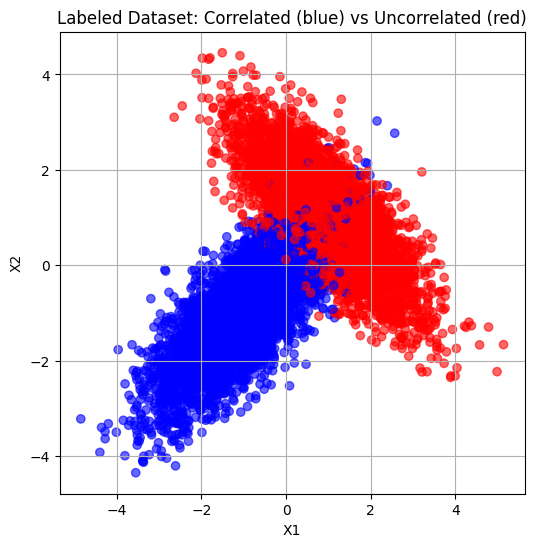

In [59]:
labels_correlated = np.ones((N, 1))  # Label 1 for correlated data
labels_uncorrelated = np.zeros((N, 1))  # Label 0 for uncorrelated data

# Merge the datasets
X = np.vstack((data_correlated, data_uncorrelated))  # Features
y_df = np.vstack((labels_correlated, labels_uncorrelated))
y = np.hstack((labels_correlated.ravel(), labels_uncorrelated.ravel()))

# Convert to a Pandas DataFrame
df = pd.DataFrame(np.hstack((X, y_df)), columns=['X1', 'X2', 'Label'])

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows
print(df.head())

# Plot the labeled dataset
plt.figure(figsize=(6, 6))
colors = ['blue' if label == 1 else 'red' for label in df['Label']]
plt.scatter(df['X1'], df['X2'], c=colors, alpha=0.6)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Labeled Dataset: Correlated (blue) vs Uncorrelated (red)")
plt.grid(True)
plt.show()

Now we can use 5-fold cross-validation to compare the accuracy of Naïve Bayes, Logistic Regression, Linear Discriminant Analysis (LDA), and Quadratic Discriminant Analysis (QDA) on the generated dataset:

Steps:

1. Generate the dataset (correlated and uncorrelated samples with labels).
2. Split the data into training and validation folds using 5-fold cross-validation.
3. Train and evaluate each classifier using cross-validation.
4. Compare their mean accuracy scores.


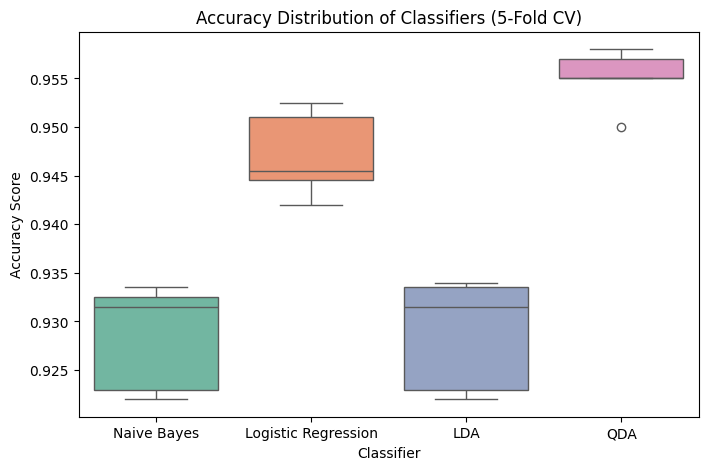

In [60]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Define classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Perform 5-fold cross-validation and store accuracy scores
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = {name: cross_val_score(model, X, y, cv=kf) for name, model in classifiers.items()}

# Convert results into a format suitable for boxplot
data = []
for name, scores in accuracy_scores.items():
    for score in scores:
        data.append((name, score))

# Create a DataFrame for visualization
import pandas as pd
df = pd.DataFrame(data, columns=["Classifier", "Accuracy"])

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Classifier", y="Accuracy", hue="Classifier", data=df, legend=False, palette="Set2")
plt.title("Accuracy Distribution of Classifiers (5-Fold CV)")
plt.ylabel("Accuracy Score")
plt.xlabel("Classifier")
plt.show()


Perform paired t-tests between each pair of classifiers

In [61]:
from scipy.stats import ttest_rel

classifier_names = list(classifiers.keys())
p_values = {}

for i in range(len(classifier_names)):
    for j in range(i + 1, len(classifier_names)):
        clf1, clf2 = classifier_names[i], classifier_names[j]
        t_stat, p_value = ttest_rel(accuracy_scores[clf1], accuracy_scores[clf2])
        p_values[f"{clf1} vs {clf2}"] = p_value

# Print results
for comparison, p_value in p_values.items():
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"{comparison}: p = {p_value:.4f} ({significance})")


Naive Bayes vs Logistic Regression: p = 0.0011 (Significant)
Naive Bayes vs LDA: p = 0.2080 (Not Significant)
Naive Bayes vs QDA: p = 0.0001 (Significant)
Logistic Regression vs LDA: p = 0.0012 (Significant)
Logistic Regression vs QDA: p = 0.0067 (Significant)
LDA vs QDA: p = 0.0001 (Significant)
